In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt

In [ ]:
def IsPD(Q):
  return np.all(np.linalg.eigvals(Q) > 0)

def IsSymmetric(Q):
  return np.all(Q==Q.T)


In [ ]:
def generateCDMatrix(n,CD):
  cond_P = CD     # Condition number
  log_cond_P = np.log(cond_P)
  exp_vec = np.arange(-log_cond_P/4., log_cond_P * (n + 1)/(4 * (n - 1)), log_cond_P/(2.*(n-1)))
  s = np.exp(exp_vec)
  S = np.diag(s)
  np.random.seed(42)
  U, _ = np.linalg.qr((np.random.rand(n, n) - 5.) * 200)
  V, _ = np.linalg.qr((np.random.rand(n, n) - 5.) * 200)
  P = U.dot(S).dot(V.T)
  #symmetric matrix
  P = P.dot(P.T)
  return (P+P.T)


In [ ]:
def return_max_min(C):
   egvs = np.linalg.eigvalsh(C)
   return min(egvs) , max(egvs)


In [ ]:
class QuadraticSD():
  def __init__(self, Q ,b):
    super(QuadraticSD, self).__init__()
    self.Q=Q
    self.b=b.reshape(-1,1)
    self.N=Q.shape[0]
    self.Optimal_Value = (np.linalg.inv(Q)@b).reshape(-1,1)
  
  def QuadraticFunction(self,x):
    return (1/2*(x.T@Q)@x - b@x)
  
  def QuadraticDerivative(self,x):
    return self.Q@x-self.b    
  
  def IsPD(self):
    return np.all(np.linalg.eigvals(self.Q) > 0)

  def IsSymmetric(self):
    return np.all(self.Q==self.Q.T)
  
  def L2norm(self,dk):
    return np.linalg.norm(dk)
  
  def AlphaQuadratic(self,dk):
    return (dk.T@dk)/((dk.T@self.Q)@dk)

  def QuadraticSteepestDescent(self,x,epochs=-1,stopping_criteria="direction_magnitude",cutoff=1e-10):
    epoch=0
    f_previous_iter=self.QuadraticFunction(x)[0][0]
    function_values=[]
    x_values=[]
    derivative_values=[]
    function_values.append(f_previous_iter)
    x_values.append(x)
    x_prev=x

    while True:
      epoch+=1
      dk=self.QuadraticDerivative(x)
      alpha=self.AlphaQuadratic(dk)[0][0]
      if np.isnan(alpha):
        break
      x=x-alpha*dk

      f_present_iter=self.QuadraticFunction(x)[0][0]
      function_values.append(f_present_iter)
      x_values.append(x)
      derivative_values.append(self.L2norm(dk))

      if stopping_criteria=="direction_magnitude" and self.L2norm(dk)<cutoff:
        break
      if stopping_criteria=="closeness_optimal" and self.L2norm(x-self.Optimal_Value)<cutoff:
        break
      if stopping_criteria =="relative_function_change" and (abs(f_present_iter-f_previous_iter)/f_previous_iter) < cutoff:
        break
      if stopping_criteria=="relative_value_change" and (self.L2norm(x-x_prev)/self.L2norm(x_prev))<cutoff:
        break
  
      x_prev=x
      f_previous_iter=f_present_iter
    return x,epoch,function_values,x_values,derivative_values

In [ ]:
N_iter=1
N=100
CD_NO=[]
epochs_taken=[]
CD=11

for i in range(N_iter):
  random_seed=np.random.randint(200)
  #Q=make_spd_matrix(N,random_state=random_seed)
  #Q=(Q+Q.T)
  try:
    Q=generateCDMatrix(N,CD)
  except:
    CD+=1
    continue  
  b=np.random.rand(N)
  qsd=QuadraticSD(Q,b)
  if (qsd.IsSymmetric() and qsd.IsPD) == False:
    continue
  lambda_min,lambda_max=return_max_min(Q)
  start_value=np.ones(N).reshape(-1,1)
  x_optimal,epoch,function_values,x_values,derivative_values=qsd.QuadraticSteepestDescent(start_value,stopping_criteria="relative_value_change",cutoff=1e-5)
  CD_NO.append(lambda_max/lambda_min)
  epochs_taken.append(epoch)
  print("Process completed for random matrix No ",i)
  CD+=1

Process completed for random matrix No  0


Text(0.5, 0, 'N (dimension)')

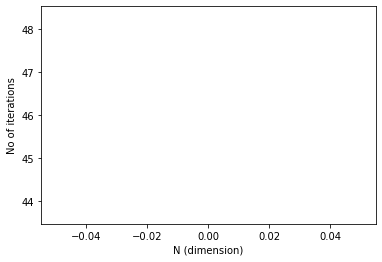

In [ ]:
plt.plot(epochs_taken)
plt.ylabel("No of iterations")
plt.xlabel("N (dimension)")

Text(0, 0.5, 'No of Iterations')

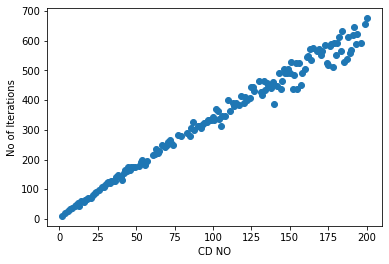

In [ ]:
plt.scatter(CD_NO,epochs_taken)
plt.xlabel("CD NO")
plt.ylabel("No of Iterations")

In [ ]:
Q.shape

(100, 100)

In [ ]:
CD

11

Text(0.5, 0, 'No of Iterations')

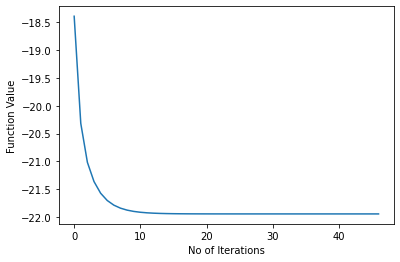

In [ ]:
plt.plot(function_values)
plt.ylabel("Function Value")
plt.xlabel("No of Iterations")

Text(0.5, 0, 'No of Iterations')

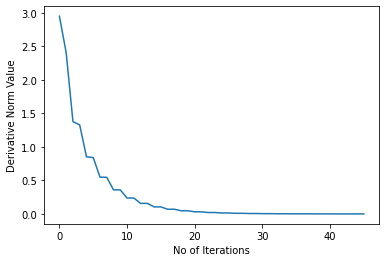

In [ ]:
plt.plot(derivative_values)
plt.ylabel("Derivative Norm Value")
plt.xlabel("No of Iterations")

In [ ]:
N=10
random_seed=np.random.randint(200)
Q=make_spd_matrix(N,random_state=random_seed)
Q=(Q+Q.T)
b=np.random.rand(N)
#Q=np.array([[10.0,20.0,30.0],[20.0,1.0,4.0],[3.0,4.0,5.0]])
#Q=np.dot(Q, Q.transpose())
#b=np.array([1,1,1])"""

In [ ]:
qsd=QuadraticSD(Q,b)
assert(qsd.IsSymmetric() and qsd.IsPD)

In [ ]:
#qsd.Optimal_Value.shape

In [ ]:
#closeness_optimal
#direction_magnitude
#relative_function_change
#relative_value_change
#"direction_magnitude will stop when the magnitude of direction is smaller than cutoff"
#"closeness to optimal solution will stop when xk is close to optimal value"
#"Stops when the relative change is function value is less than cutoff"
#"Stops when the relative change of x value is less than cutoff"
lambda_min,lambda_max=return_max_min(Q)
start_value=np.ones(N).reshape(-1,1)
x_optimal,epoch,function_values,x_values=qsd.QuadraticSteepestDescent(start_value,stopping_criteria="relative_value_change")

In [ ]:
#epoch

In [ ]:
#plt.plot(function_values)

0.00013983249876398682

In [ ]:
# 2D Example of Quadratic Interpolation

In [ ]:
N=2
random_seed=np.random.randint(200)
Q=make_spd_matrix(N,random_state=random_seed)
Q=(Q+Q.T)
b=np.random.rand(N)

In [ ]:
qsd=QuadraticSD(Q,b)
assert(qsd.IsSymmetric() and qsd.IsPD)

In [ ]:
lambda_min,lambda_max=return_max_min(Q)
start_value=2*np.ones(N).reshape(-1,1)
x_optimal,epoch,function_values,x_values,derivative_values=qsd.QuadraticSteepestDescent(start_value,stopping_criteria="relative_value_change")

In [ ]:
x_optimal

array([[0.11254568],
       [0.37164224]])

In [ ]:
qsd.Optimal_Value

array([[0.11254568],
       [0.37164224]])

In [ ]:
len(x_values)

24

In [ ]:
%matplotlib inline

In [ ]:
def drawPlots(x_values,xmin=-3,xmax=3,ymin=-3,ymax=3):
  xmesh, ymesh = np.mgrid[xmin:xmax:50j,ymin:ymax:50j]
  fmesh=np.zeros((50,50))
  for i in range(50):
    for j in range(50):
      fmesh[i][j]=qsd.QuadraticFunction(np.array([xmesh[i][j],ymesh[i][j]]))
  fig = plt.figure()
  ax = fig.gca(projection="3d")


  ax.plot_surface(xmesh, ymesh, fmesh)

  print("")
  fig = plt.figure()
  plt.axis("equal")
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.contour(xmesh, ymesh, fmesh)

  print("")
  fig = plt.figure()
  plt.contour(xmesh, ymesh, fmesh)
  plt.xlabel("x1")
  plt.ylabel("x2")
  it_array = np.array(x_values).reshape(len(x_values),2)
  plt.plot(it_array.T[0], it_array.T[1], "x-")

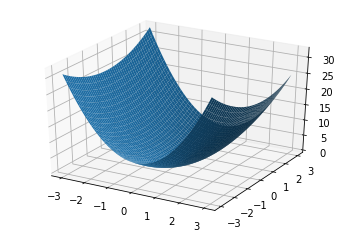

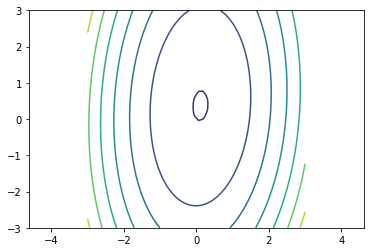

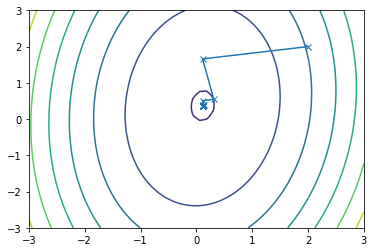

In [ ]:
drawPlots(x_values)

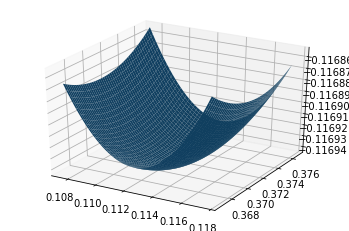

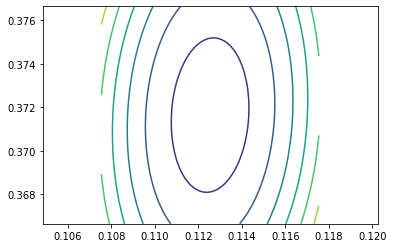

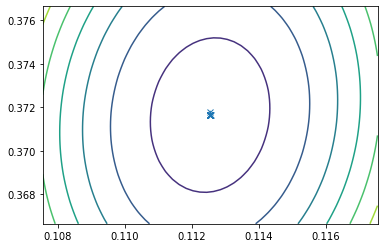

In [ ]:
k=0.005
drawPlots(x_values[-15:], x_optimal[0][0]-k,x_optimal[0][0]+k,x_optimal[1][0]-k, x_optimal[1][0]+k)

In [ ]:
x_optimal[1][0]

0.3716422424812782